##Hypotheses:

Is there a correlation between the release time and revenue?

Examining the correlation between genre and revenue

Games with high reviewScores and positive reviewScore generate higher revenue.

Comments:
 - Amirreza: I used the mean of review score to divide the games into two groups, one with higher than normal score and the other with the game with the lower that average score. The average of revenue for high score games is higher, proving the hypothesis.

Genres with highest revenue.

Do more expensive games have higher rating?:

Comments : 
- Amirreza: I’ve done some analyses. It seems that cheaper games have higher review score. I used the average price as the indicator and then by using threshold created two data frames, one for expensive and one for cheap games. The average of cheap games review score is higher than the expensive games.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset 
file = "..\\data\\merged_clean_owen2.csv"
df = pd.read_csv(file)


# 1. Correlation between Release Time and Revenue
# Question 1: Do games that come out during steam sales have a better chance of generating higher revenue?

# Define all Steam sales periods from January to September
def get_steam_sales_dates(): 
    sales = { 
             "Economy & Capitalism Fest": ["2024-01-08", "2024-01-15"], 
             "Pirates & Ninjas Fest": ["2024-01-22", "2024-01-29"], 
             "Neo Fest": ["2024-02-05", "2024-02-12"], 
             "Remote Play Together Fest": ["2024-02-12", "2024-02-19"], 
             "Dinosaures & Robots Fest": ["2024-02-26", "2024-03-04"], 
             "Spring sales": ["2024-03-14", "2024-03-21"], 
             "Deck constructor Fest": ["2024-03-25", "2024-04-01"], 
             "FPS Fest": ["2024-04-15", "2024-04-22"], 
             "Farming Fest": ["2024-04-29", "2024-05-06"], 
             "Games with infinite replayability Fest": ["2024-05-13", "2024-05-20"], 
             "Survival games Fest": ["2024-05-27", "2024-06-03"], 
             "Neo Fest (june)": ["2024-06-10", "2024-06-17"], 
             "Summer sales": ["2024-06-27", "2024-07-11"], 
             "Tower Defense Fest": ["2024-07-29", "2024-08-05"], 
             "Fighting Games Fest": ["2024-08-05", "2024-08-12"], 
             "Rhythm Fest 2024": ["2024-08-16", "2024-08-26"], 
             "Space Exploration Fest": ["2024-09-02", "2024-09-09"] 
             } 
    return sales



steam_sales = get_steam_sales_dates() 


def is_in_period(date, periods): 
    for start, end in periods.values(): 
        if start <= date <= end: 
            return True 
        return False

# # Add new column to the DataFrame for Steam sales
df['is_steam_sale'] = df['release_date'].apply(lambda x: is_in_period(x, steam_sales)) 


# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date']) 

# Get the top 5 highest grossing games released during Steam sales
top_5_steam_sales = df[df['is_steam_sale']].nlargest(5, 'revenue')[['name', 'revenue']] 

# Get the top 5 highest grossing games released outside of Steam sales
top_5_non_sales = df[~df['is_steam_sale']].nlargest(5, 'revenue')[['name', 'revenue']]

# Calculate the mean revenue for games released during and outside of Steam sales
mean_revenue_steam_sales = df[df['is_steam_sale']]['revenue'].mean() 
mean_revenue_non_sales = df[~df['is_steam_sale']]['revenue'].mean() 

# Calculate the overall average revenue
overall_mean_revenue = df['revenue'].mean()

# Print the results
print("Top 5 highest grossing games released during the Steam Sale:") 
print(top_5_steam_sales) 
print("\nTop 5 highest grossing games released out of the Steam Sale:") 
print(top_5_non_sales) 
print(f"\nMean revenue of game released during Steam Sale : {mean_revenue_steam_sales:.2f}") 
print(f"Mean revenue of game released out of Steam Sale : {mean_revenue_non_sales:.2f}")
print(f"Overall mean revenue: {overall_mean_revenue:.2f}")


Top 5 highest grossing games released during the Steam Sale:
                            name    revenue
1141               House Builder  1490579.0
1160        RAID: Shadow Legends  1293328.0
1176                   KinitoPET  1166563.0
1205  Momodora: Moonlit Farewell   927493.0
1271                War Hospital   673600.0

Top 5 highest grossing games released out of the Steam Sale:
                    name      revenue
1462  Black Myth: Wukong  837793356.0
1463       HELLDIVERS™ 2  435635596.0
1464            Palworld  392328553.0
1465  Sons Of The Forest  217017892.0
1466    Dragon's Dogma 2  111478291.0

Mean revenue of game released during Steam Sale : 319158.21
Mean revenue of game released out of Steam Sale : 2659939.32
Overall mean revenue: 2615043.39


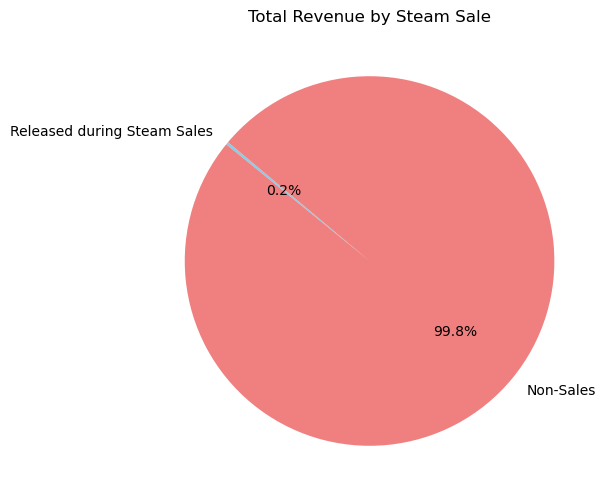

In [5]:
#Scatter plot of all games, with games released during Steam sales in green and games released outside of Steam sales in red.

# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='release_date', y='revenue', data=df, hue='is_steam_sale', palette=['g', 'r'])

# Calculate total revenue for each group
total_revenue_steam_sales = df[df['is_steam_sale']]['revenue'].sum()
total_revenue_non_sales = df[~df['is_steam_sale']]['revenue'].sum()

# List of total revenues
total_revenues = [total_revenue_steam_sales, total_revenue_non_sales]

# Create a list of labels
labels = ['Released during Steam Sales', 'Non-Sales']

# Create a pie chart with Seaborn
plt.figure(figsize=(8, 6))
plt.pie(total_revenues, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Total Revenue by Steam Sale')
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_18328\3920179465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='revenue', data=top_5_steam_sales, label='Top 5 Steam Sales', palette='Set2')


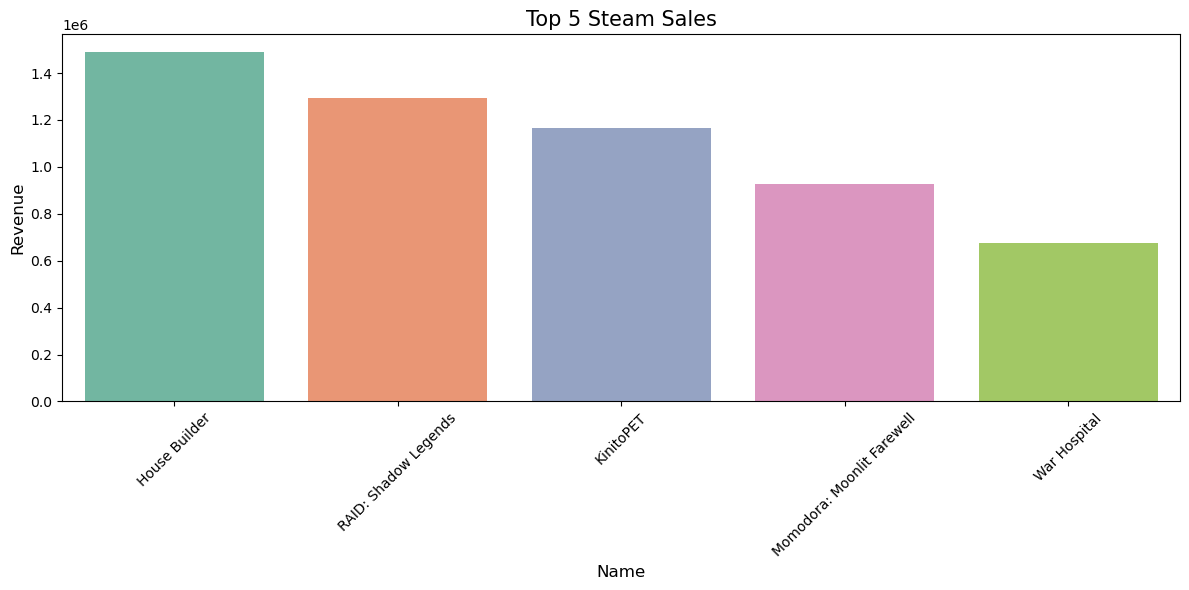

In [ ]:
# Add the top 5 highest grossing games during Steam Sales

plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='revenue', data=top_5_steam_sales, label='Top 5 Steam Sales', palette='Set2')
plt.title('Top 5 Steam Sales', fontsize=15)
plt.xlabel('Name', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_18328\666589391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='revenue', data=top_5_non_sales, label='Top 5 Non-Sales', palette='Set2')


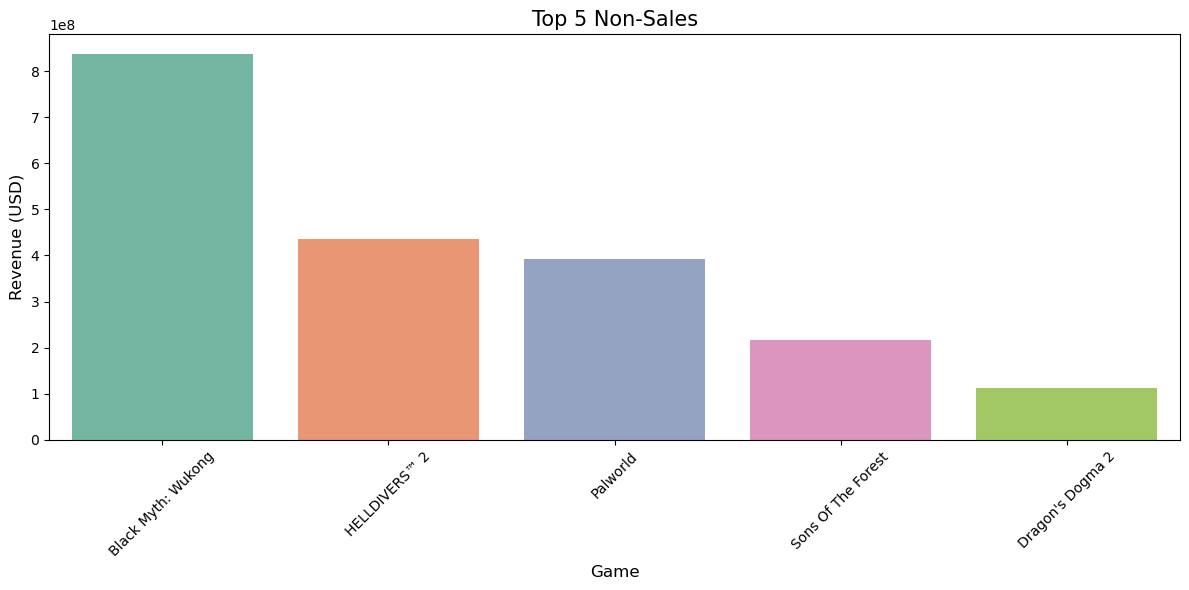

In [38]:
# Add the top 5 highest grossing games out of Steam Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='revenue', data=top_5_non_sales, label='Top 5 Non-Sales', palette='Set2')
plt.title('Top 5 Non-Sales', fontsize=15)
plt.xlabel('Game', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_18328\3390106468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Mean Revenue', data=plot_data, palette='Set2')


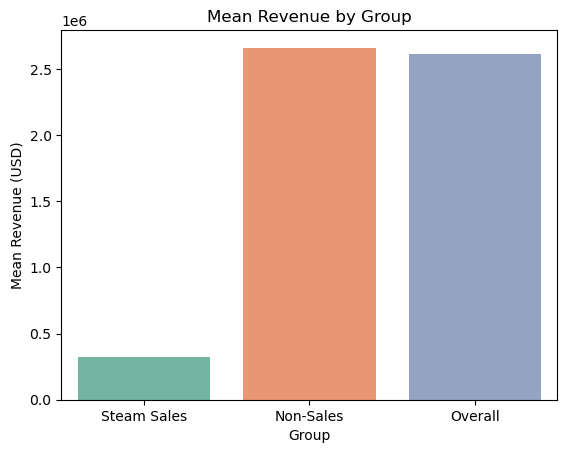

In [ ]:
# DataFrame for plotting
plot_data = pd.DataFrame({'Group': ['Steam Sales', 'Non-Sales', 'Overall'],
                           'Mean Revenue': [mean_revenue_steam_sales, mean_revenue_non_sales, overall_mean_revenue]})

# Mean revenue by group
sns.barplot(x='Group', y='Mean Revenue', data=plot_data, palette='Set2')
plt.title('Mean Revenue by Group')
plt.ylabel('Mean Revenue (USD)')
plt.show()